In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
#Import danych
df = pd.read_csv("/work/dane_sprzedaz_.csv" , sep = "," , encoding = 'utf-8')


In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1459.000000,1460.000000,1460.000000,1458.000000,1460.000000,1452.000000,1459.000000,...,1460.000000,1459.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10509.714188,6.099315,5.575342,1971.278464,1984.865753,103.685262,443.521590,...,94.244521,46.667581,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9980.984039,1.382997,1.112799,30.220613,20.645407,181.066207,456.232131,...,125.338794,66.278157,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.500000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
# Czyszczenie danych
df.pop('Id')
df.loc[:,'MSSubClass'] = df['MSSubClass'].astype('object')
df.loc[:,'Alley'] = df['Alley'].fillna('None')
df = df[df['MasVnrType'].notna()]
df.loc[:,'BsmtQual'] = df['BsmtQual'].fillna('None')
df.loc[:,'BsmtCond'] = df['BsmtCond'].fillna('None')
df.loc[:,'BsmtExposure'] = df['BsmtExposure'].fillna('None')
df.loc[:,'BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
df.loc[:,'BsmtFinType2'] = df['BsmtFinType2'].fillna('None')
df = df[df['Electrical'].notna()]
df = df[df['LotFrontage'].notna()]
df.loc[:,'FireplaceQu'] = df['FireplaceQu'].fillna('None')
df.loc[:,'GarageType'] = df['GarageType'].fillna('None')
df.loc[:,'GarageFinish'] = df['GarageFinish'].fillna('None')
df.loc[:,'GarageQual'] = df['GarageQual'].fillna('None')
df.loc[:,'PoolQC'] = df['PoolQC'].fillna('None')
df.loc[:,'Fence'] = df['Fence'].fillna('None')
df.loc[:,'MiscFeature'] = df['MiscFeature'].fillna('None')
df.loc[:,'GarageCond'] = df['GarageCond'].fillna('None')
# df = df.drop(columns=['SaleType'])
df.dropna(subset=['SaleType'])
df = df.drop(columns=['GarageYrBlt'])

In [5]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917.0,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175.0,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042.0,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717.0,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,4,2010,WD,Normal,142125


In [6]:
def label_columns(df):
    object_df = df.select_dtypes(include='object')
    numeric_df = df.select_dtypes(include=['int', 'float'])
    for column in object_df.columns:
        # Check if the column type is 'object' and has more than 3 unique values
        if  object_df[column].nunique() > 3:
            # Use LabelEncoder on the column
            encoder = LabelEncoder()
            object_df[column] = encoder.fit_transform(object_df[column])
        elif object_df[column].nunique() <= 3:
            # Split the column into multiple columns using get_dummies()
            dummies = pd.get_dummies(object_df[column], prefix=column)

            # Keep only the first 3 columns
            dummies = dummies.iloc[:, :3]

            # Assign the values to the original DataFrame
            object_df = pd.concat([object_df, dummies], axis=1)

            # Replace the original column with 1 for the matching value and 0 for others
            for dummy_column in dummies.columns:
                object_df[dummy_column] = object_df[column].apply(lambda x: 1 if x == dummy_column.replace(f'{column}_', '') else 0)

            # Drop the original column
            object_df = object_df.drop(column, axis=1)
    combined_df = pd.concat([numeric_df, object_df], axis=1)
    return combined_df

In [7]:
new_df = label_columns(df)

/tmp/ipykernel_178/1251023479.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_df[column] = encoder.fit_transform(object_df[column])


In [8]:
new_df

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Alley_Pave,Utilities_AllPub,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,CentralAir_N,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,65.0,8450.0,7,5,2003.0,2003,196.0,706.0,0,150,...,0,1,1,0,0,0,1,0,0,1
1,80.0,9600.0,6,8,1976.0,1976,0.0,978.0,0,284,...,0,1,1,0,0,0,1,0,0,1
2,68.0,11250.0,7,5,2001.0,2002,162.0,486.0,0,434,...,0,1,1,0,0,0,1,0,0,1
3,60.0,9550.0,7,5,1915.0,1970,0.0,216.0,0,540,...,0,1,1,0,0,0,1,0,0,1
4,84.0,14260.0,8,5,2000.0,2000,350.0,655.0,0,490,...,0,1,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917.0,6,5,1999.0,2000,0.0,0.0,0,953,...,0,1,1,0,0,0,1,0,0,1
1456,85.0,13175.0,6,6,1978.0,1988,119.0,790.0,163,589,...,0,1,1,0,0,0,1,0,0,1
1457,66.0,9042.0,7,9,1941.0,2006,0.0,275.0,0,877,...,0,1,1,0,0,0,1,0,0,1
1458,68.0,9717.0,5,6,1950.0,1996,0.0,49.0,1029,0,...,0,1,1,0,0,0,1,0,0,1


In [9]:
new_df['Utilities_AllPub']

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Name: Utilities_AllPub, Length: 1194, dtype: int64

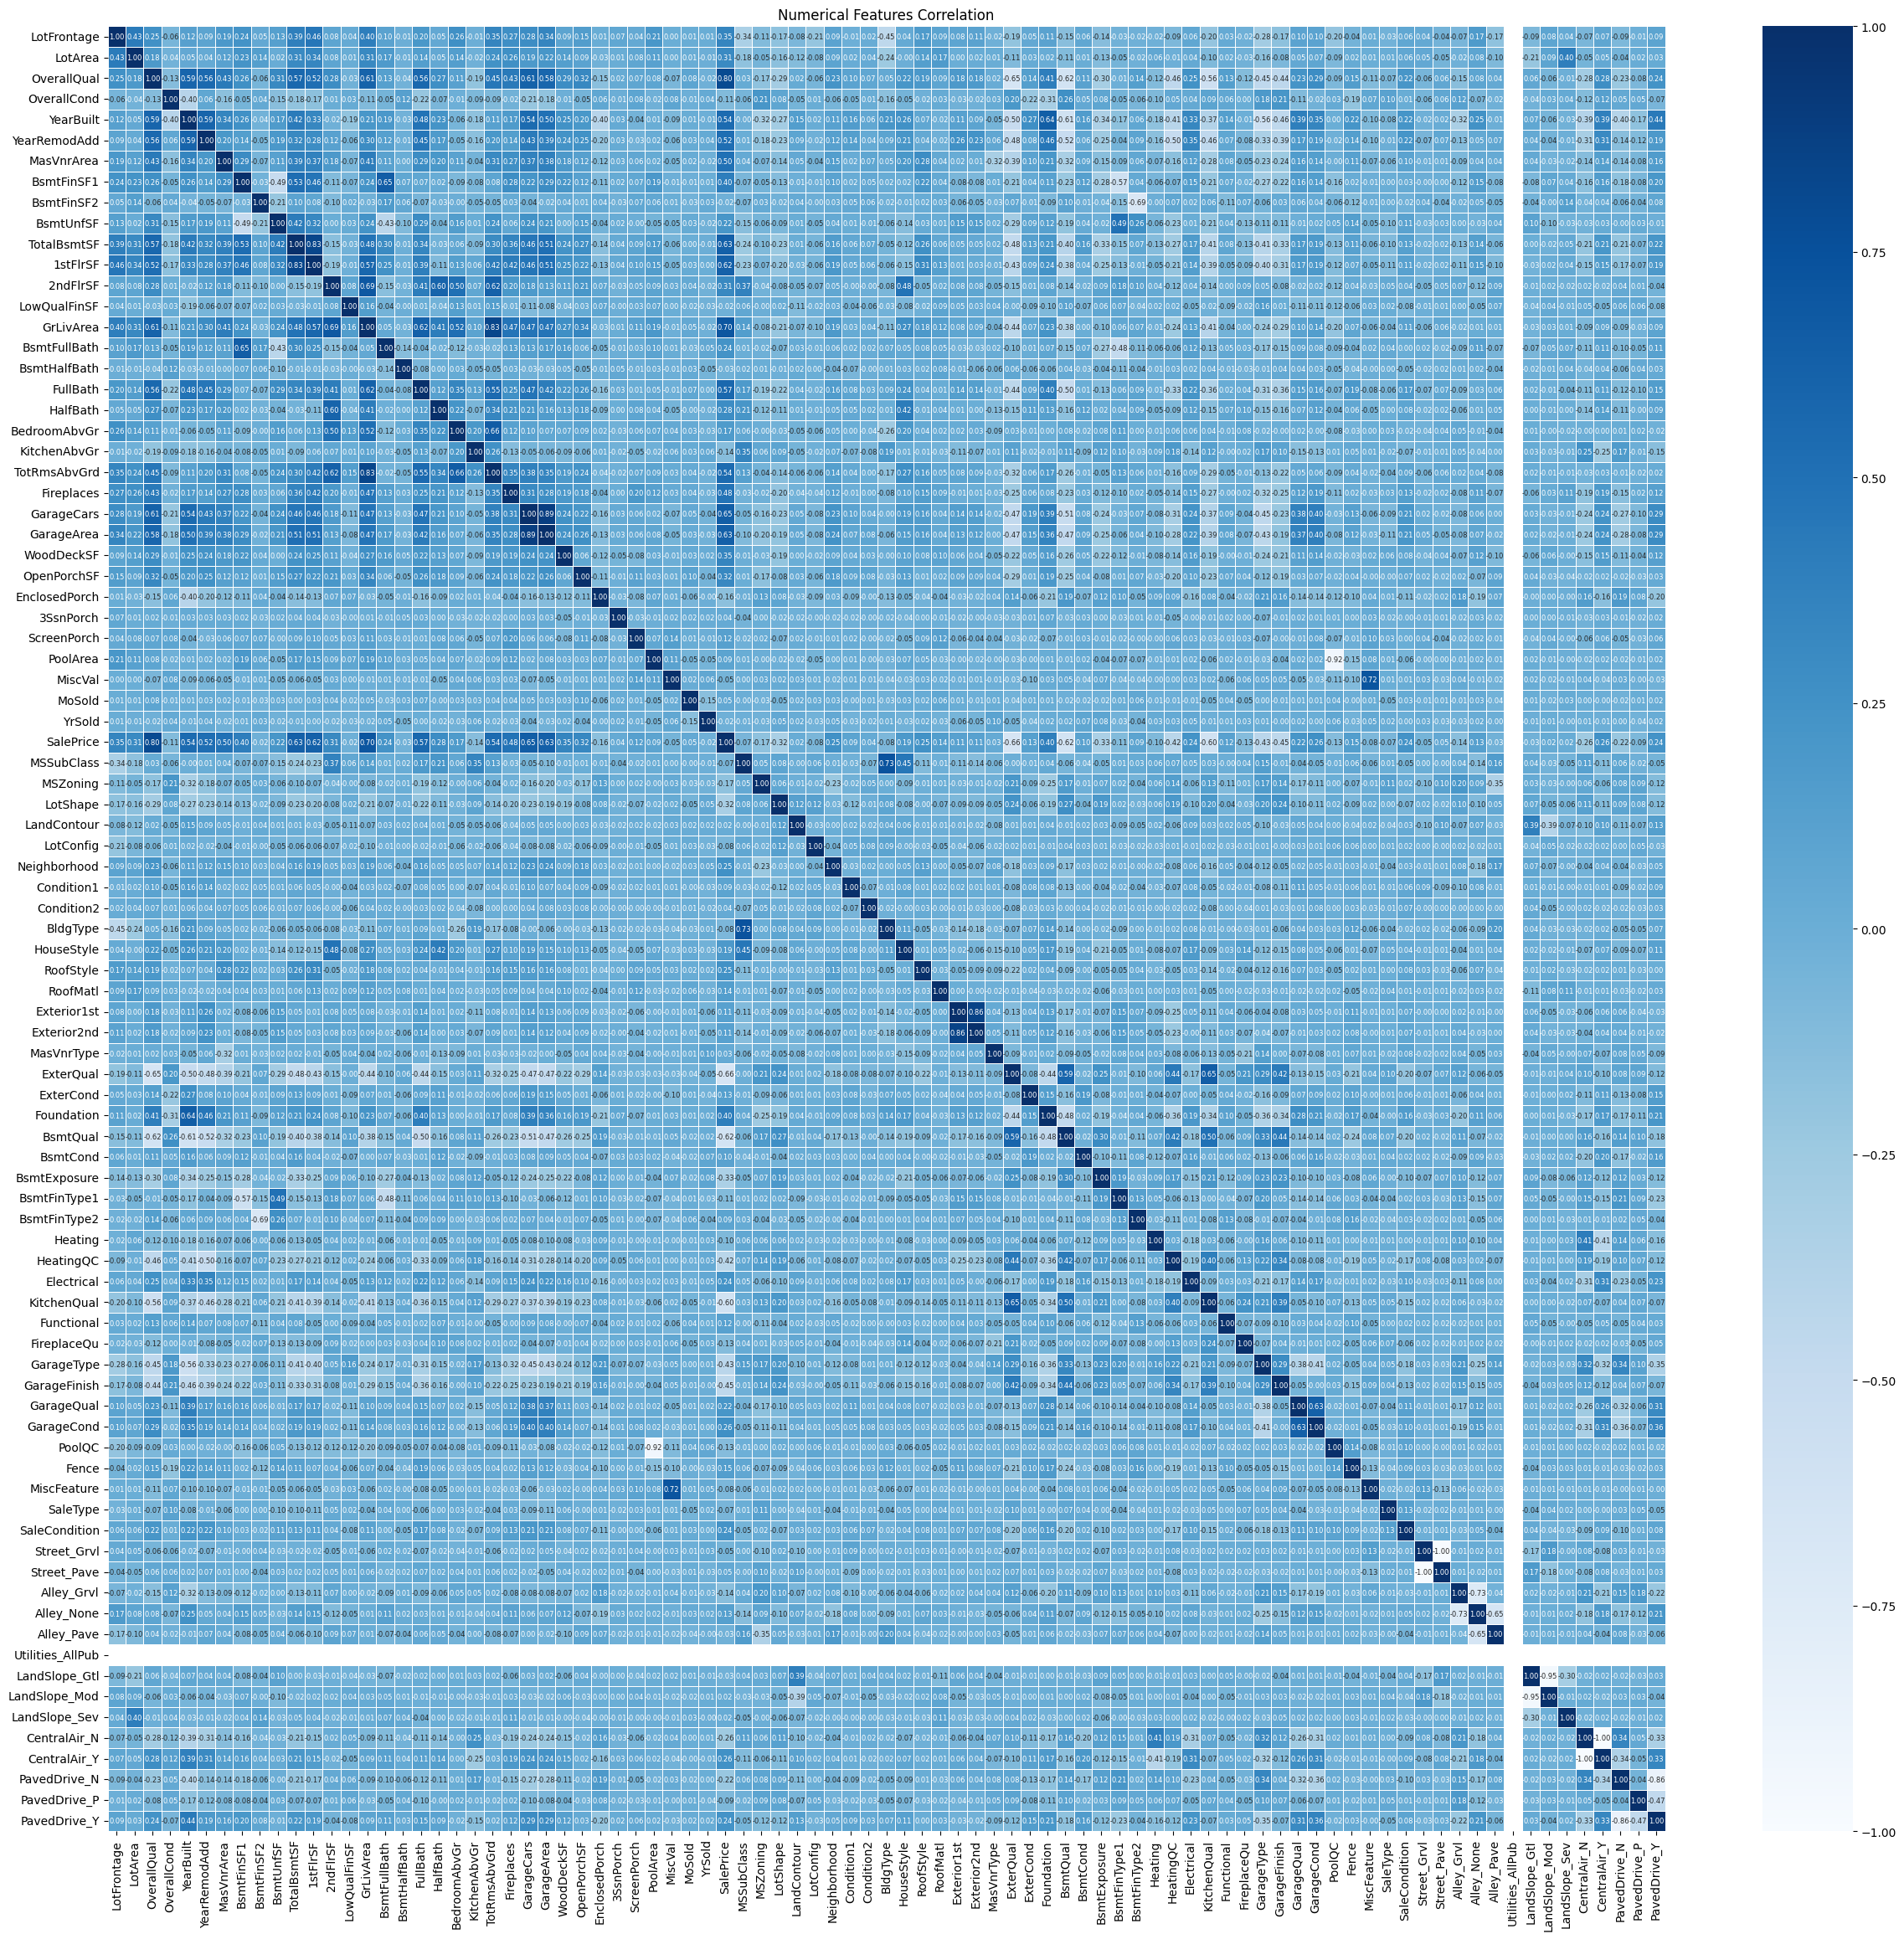

In [10]:
#Heatmapa z korelacjami
plt.figure(figsize=(30, 28))  # Adjust the figure size to accommodate 88 columns

corr_matrix = new_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5, cmap='Blues', annot_kws={"fontsize": 6})

plt.title('Numerical Features Correlation')
plt.show()

In [11]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917.0,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175.0,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042.0,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717.0,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,4,2010,WD,Normal,142125


In [12]:
new_df

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Alley_Pave,Utilities_AllPub,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,CentralAir_N,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,65.0,8450.0,7,5,2003.0,2003,196.0,706.0,0,150,...,0,1,1,0,0,0,1,0,0,1
1,80.0,9600.0,6,8,1976.0,1976,0.0,978.0,0,284,...,0,1,1,0,0,0,1,0,0,1
2,68.0,11250.0,7,5,2001.0,2002,162.0,486.0,0,434,...,0,1,1,0,0,0,1,0,0,1
3,60.0,9550.0,7,5,1915.0,1970,0.0,216.0,0,540,...,0,1,1,0,0,0,1,0,0,1
4,84.0,14260.0,8,5,2000.0,2000,350.0,655.0,0,490,...,0,1,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917.0,6,5,1999.0,2000,0.0,0.0,0,953,...,0,1,1,0,0,0,1,0,0,1
1456,85.0,13175.0,6,6,1978.0,1988,119.0,790.0,163,589,...,0,1,1,0,0,0,1,0,0,1
1457,66.0,9042.0,7,9,1941.0,2006,0.0,275.0,0,877,...,0,1,1,0,0,0,1,0,0,1
1458,68.0,9717.0,5,6,1950.0,1996,0.0,49.0,1029,0,...,0,1,1,0,0,0,1,0,0,1


In [13]:
new_df = new_df.dropna() # to nie powinno być wcześniej???????????? tutaj usuwa wiersze, gdzie brakuje lot frontage

In [14]:
# podział danych na testowe i treningowe
X_train, X_test, y_train, y_test = train_test_split(
    new_df.drop(columns=['SalePrice']), new_df['SalePrice'], random_state=29
)

In [15]:
# RandomForestRegressor szukanie optymalnych wartości parametrów
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 20]}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring= 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 20],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_mean_squared_error')

In [16]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=50)

In [17]:
importances = grid_search.best_estimator_.feature_importances_

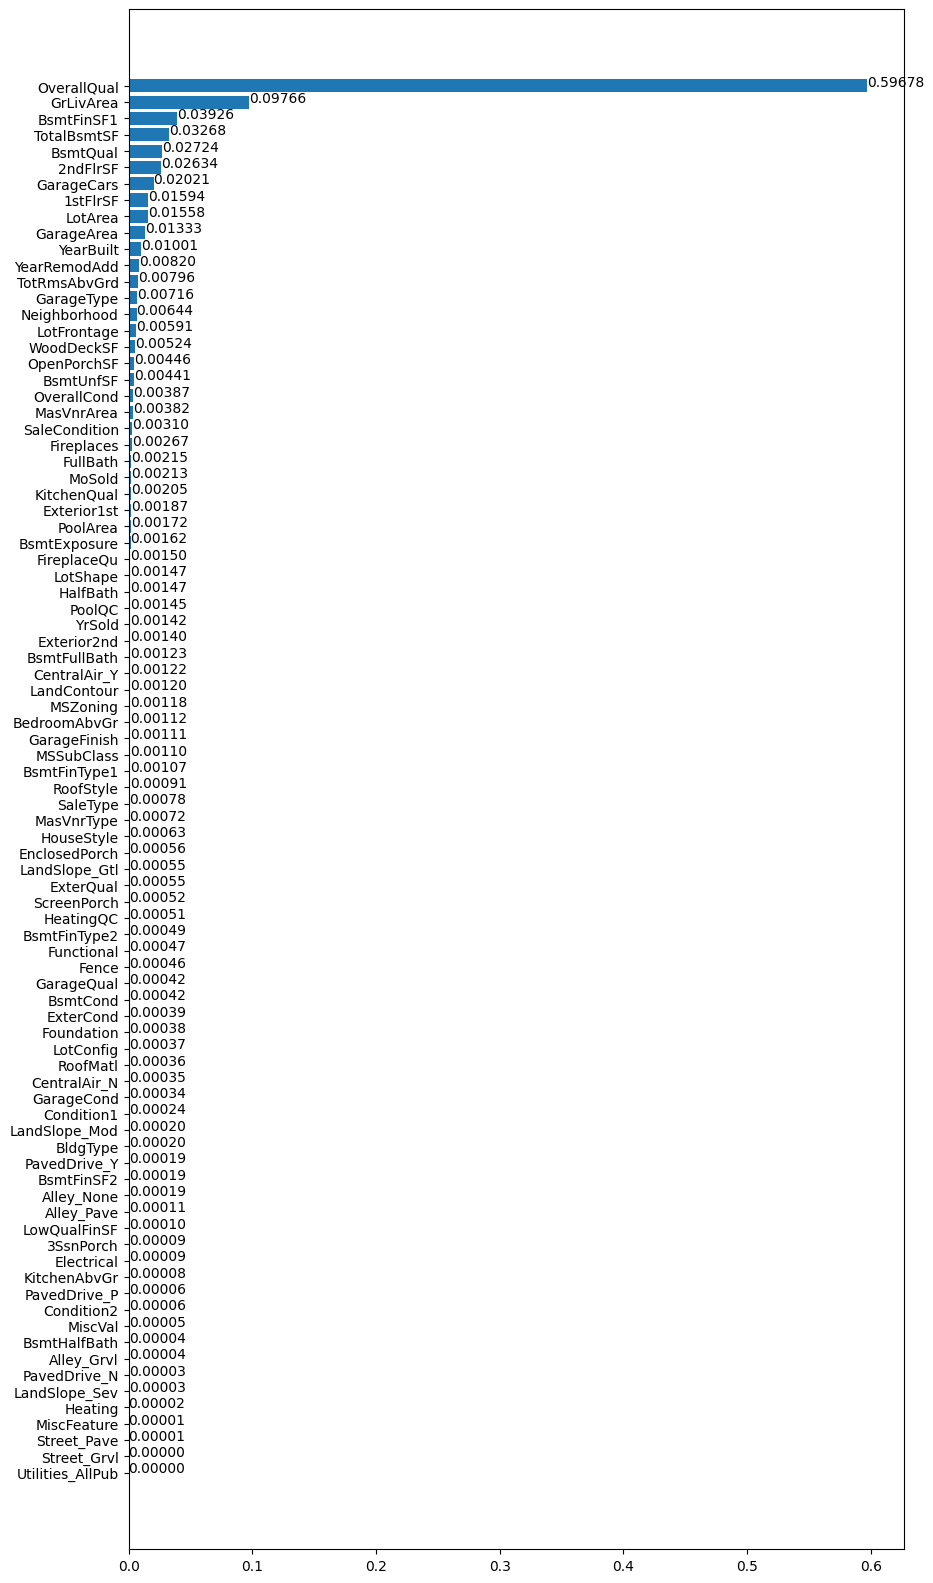

In [18]:
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 20))

# Your code for creating the horizontal bar chart
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

# Adding decimal score annotations on the right side of each bar
for i, v in enumerate(importances[indices]):
    ax.text(v, i, f'{v:.5f}')

plt.show()

In [19]:
# wzięcie tylko tych kolumn co mają znaczenie (wynika to z wykresu powyżej)

selected_columns = ['OverallQual', 'GrLivArea', 'BsmtFinSF1', '2ndFlrSF', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'LotArea', 'BsmtQual', 'YearRemodAdd', 'TotRmsAbvGrd', 'YearBuilt']

X_train = X_train.loc[:, selected_columns]
X_test = X_test[X_train.columns]


In [20]:
# wzięcie tylko tych kolumn co mają znaczenie


#X_train = X_train[X_train.columns[:13]]
#X_test = X_test[X_train.columns]

In [21]:
X_train

,OverallQual,GrLivArea,BsmtFinSF1,2ndFlrSF,GarageCars,TotalBsmtSF,1stFlrSF,GarageArea,LotArea,BsmtQual,YearRemodAdd,TotRmsAbvGrd,YearBuilt,Neighborhood
46,7,2149,1351.0,631,2,1434,1518,670,12822.0,0,2003,6,2003.0,11
1036,9,1620,1022.0,0,3,1620,1620,912,12898.0,0,2008,6,2007.0,23
1159,6,1876,442.0,933,2,901,943,540,9120.0,4,1974,8,1974.0,14
530,6,1509,783.0,0,2,1461,1509,600,10200.0,2,1989,5,1988.0,23
129,5,1053,567.0,0,2,1008,1053,750,8973.0,4,1991,6,1958.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,10,2402,1767.0,0,3,3094,2402,672,15431.0,0,2008,10,2008.0,16
1061,3,894,0.0,0,3,894,894,1248,18000.0,4,1950,6,1935.0,9
989,7,1576,0.0,798,2,770,778,614,8125.0,2,2006,6,2006.0,21
617,6,832,0.0,0,2,832,832,528,7227.0,4,1954,4,1954.0,12


In [22]:
y_train

46      239686
1036    315500
1159    185000
530     175000
129     150000
         ...  
440     555000
1061     81000
989     197000
617     105500
285     164700
Name: SalePrice, Length: 891, dtype: int64

In [23]:
# RandomForestRegressor cz 2
param_grid_adjusted = {'n_estimators': [10, 50, 100, 200, 500], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
grid_search_adjusted = GridSearchCV(RandomForestRegressor(), param_grid_adjusted, cv=5, verbose=2, scoring= 'neg_mean_squared_error')
grid_search_adjusted.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ......................max_depth=10, n_estimators=10; total time=   0.0s
[CV] END ......................max_depth=10, n_estimators=10; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=10; total time=   0.0s
[CV] END ......................max_depth=10, n_estimators=10; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=10; total time=   0.0s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.2s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.2s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.2s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.2s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.2s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.4s
[CV] END .....................max_depth=10, n_e

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                         'n_estimators': [10, 50, 100, 200, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [24]:
grid_search_adjusted.best_params_
# masz zbiór parametrów, który daje najlepszy model
grid_search_adjusted.best_estimator_

estymator_RF_1 = grid_search_adjusted 

In [25]:
print(-1*estymator_RF_1.score(X_train, y_train))
print(-1*estymator_RF_1.score(X_test, y_test))

140025778.567439
944653864.2763907


In [26]:
pred = estymator_RF_1.predict(X_test)
pred

array([121758.08, 108860.  , 123518.62, 370744.82, 275202.86, 146679.1 ,
        97038.  ,  97955.7 , 411378.42, 303280.9 , 132756.  , 128470.  ,
       275414.6 , 189025.3 , 185376.92, 119638.  , 126714.  , 265533.72,
       182538.  , 176684.32, 309357.64, 132930.  , 166544.  , 135395.8 ,
       122947.66, 126094.  , 311588.78, 175394.9 , 191358.  , 140623.  ,
       170260.  , 185660.  , 157930.32, 154528.  , 210061.88, 139973.38,
       115504.  , 191846.7 , 190837.34, 105999.5 , 127188.66, 136702.  ,
       125597.  , 137820.  , 471362.22, 117627.  , 197346.82, 121552.14,
       118861.22, 250653.5 , 121163.16, 171397.7 , 164558.  , 138205.  ,
       201114.38, 303106.3 , 179943.4 , 121717.  , 149016.  , 306937.14,
       108980.  , 152928.  , 154698.5 , 173674.84, 138955.74, 348104.18,
       110124.  , 130597.6 , 156632.  , 107333.  , 150897.  , 301655.96,
       212089.  , 124189.  , 167635.8 , 282342.26, 172719.68, 109828.  ,
       247243.66, 133067.3 , 127294.5 , 295822.7 , 

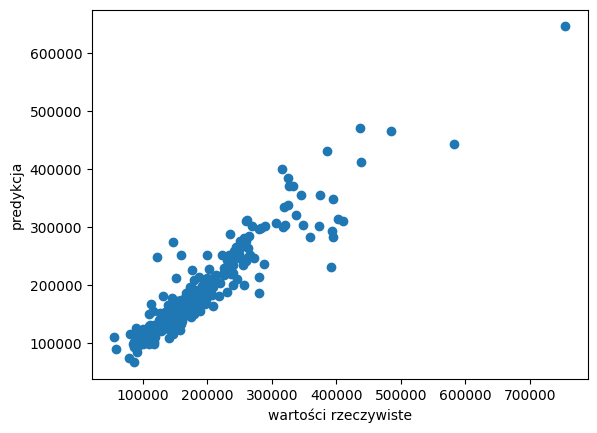

In [43]:
plt.scatter(y_test,pred)
plt.xlabel('wartości rzeczywiste')
plt.ylabel('predykcja')
plt.show()

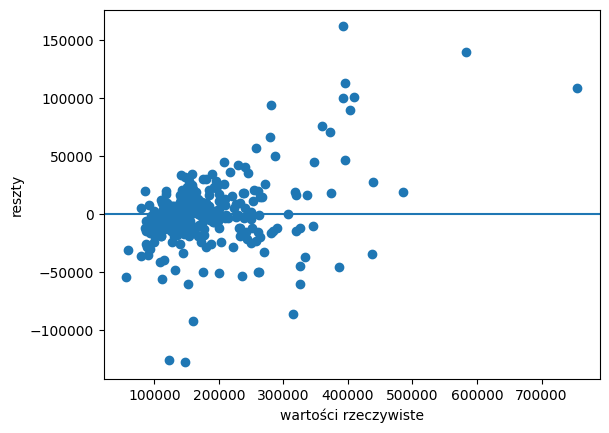

In [44]:
resid = y_test - pred
plt.scatter(y_test, resid)
plt.xlabel('wartości rzeczywiste')
plt.ylabel('reszty')
plt.axhline(0)
plt.show()

In [29]:
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 35.3 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


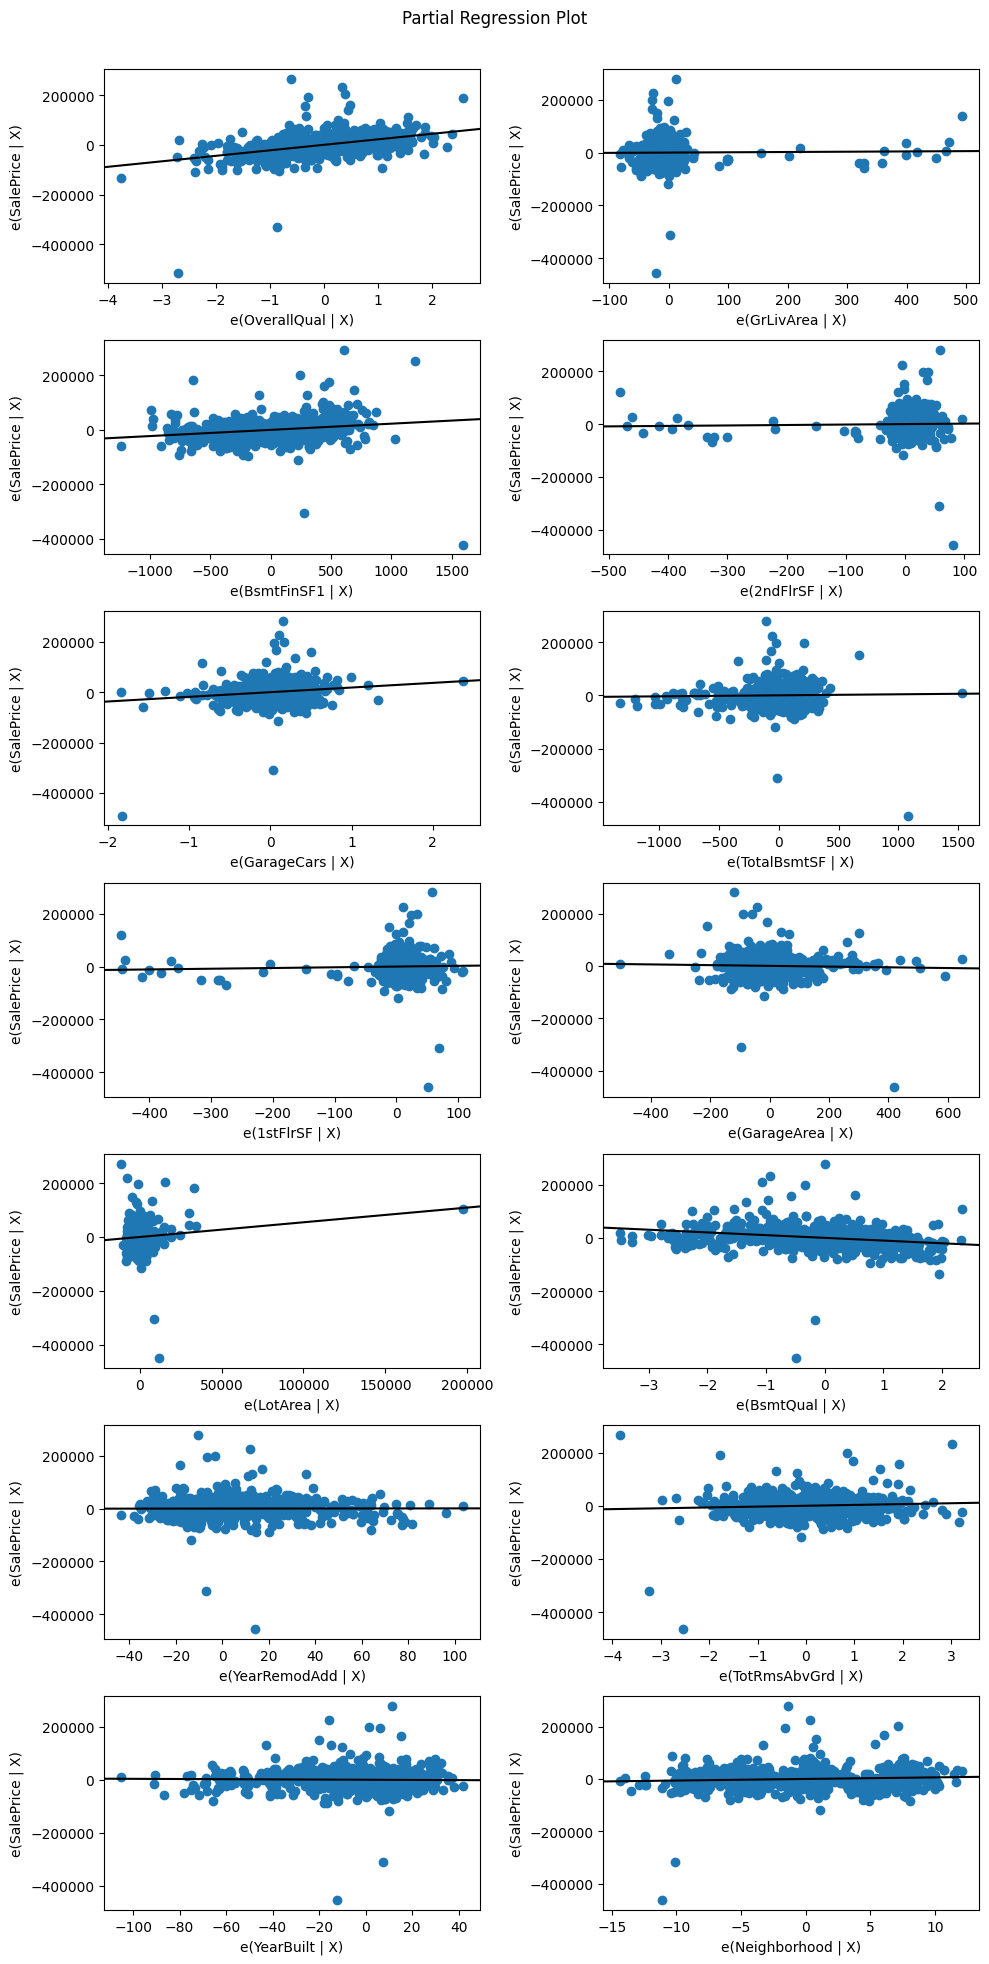

In [51]:
# Analiza reszt
fig = plt.figure(figsize=[10, 20])
sm.graphics.plot_partregress_grid(reg_lin, fig=fig)
plt.show()

In [32]:
# KNN


param_grid_adjusted_KNN = {
    'n_neighbors': np.arange(3, 121),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_adjusted_KNN = GridSearchCV(KNeighborsRegressor(), param_grid_adjusted_KNN, cv=5, verbose=2, scoring='neg_mean_squared_error')
grid_search_adjusted_KNN.fit(X_train, y_train)

[CV] END ..metric=manhattan, n_neighbors=21, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=21, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=21, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=21, weights=uniform; total time=   0.0s
[CV] END .metric=manhattan, n_neighbors=21, weights=distance; total time=   0.0s
[CV] END .metric=manhattan, n_neighbors=21, weights=distance; total time=   0.0s
[CV] END .metric=manhattan, n_neighbors=21, weights=distance; total time=   0.0s
[CV] END .metric=manhattan, n_neighbors=21, weights=distance; total time=   0.0s
[CV] END .metric=manhattan, n_neighbors=21, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=22, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=22, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=22, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan,

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([  3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120]),
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error', verbose=2)

In [33]:
print(grid_search_adjusted_KNN.best_params_)
# masz zbiór parametrów, który daje najlepszy model
print(grid_search_adjusted_KNN.best_estimator_)

estymator_KNN_3 = grid_search_adjusted_KNN 

{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
KNeighborsRegressor(metric='manhattan', n_neighbors=10, weights='distance')


In [48]:
pred_knn = estymator_KNN_3.predict(X_test)

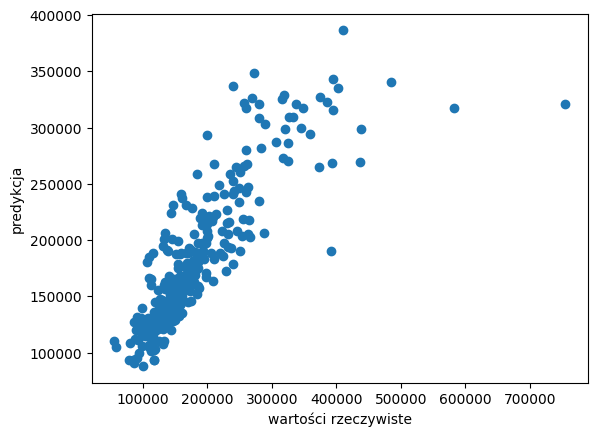

In [49]:
plt.scatter(y_test,pred_knn)
plt.xlabel('wartości rzeczywiste')
plt.ylabel('predykcja')
plt.show()

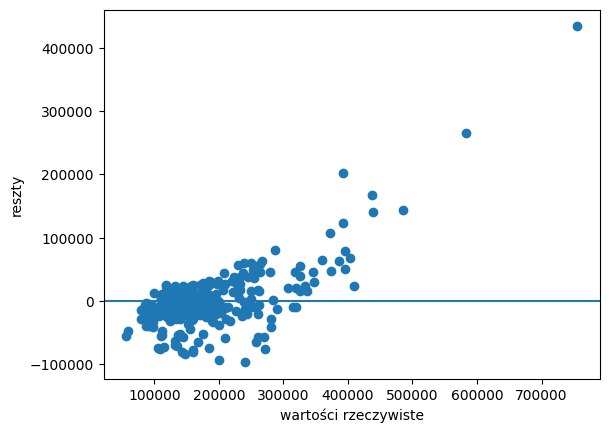

In [50]:
resid_knn = y_test - pred_knn
plt.scatter(y_test, resid_knn)
plt.xlabel('wartości rzeczywiste')
plt.ylabel('reszty')
plt.axhline(0)
plt.show()

In [34]:
y_pred = grid_search_adjusted_KNN.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred)


# mse random forest jest mniejsze, więc model jest preferencyjny ponad KNN


Mean Squared Error (MSE): 2251967378.682604
Ratio between KNN and RandomForest:  1.3889918699291166
Finally results below: /n
MSE for Linear Regression:  1621296299.4502816
MSE for Random Forest:  944653864.2763907
MSE for KNN:  2251967378.682604


In [35]:
#drzewo decyzyjne
from sklearn import tree

param_grid_adjusted_tree = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'min_samples_leaf': [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]}
grid_search_adjusted_tree = GridSearchCV(tree.DecisionTreeRegressor(), param_grid_adjusted_tree, cv=5, verbose=2, scoring= 'neg_mean_squared_error')
grid_search_adjusted_tree.fit(X_train, y_train)

[CV] END ..................max_depth=10, min_samples_leaf=50; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_leaf=50; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_leaf=50; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_leaf=50; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_leaf=55; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_leaf=55; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_leaf=55; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_leaf=55; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_leaf=55; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_leaf=60; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_leaf=60; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_leaf=60; total time=   0.0s
[CV] END ..................m

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                         'min_samples_leaf': [1, 5, 10, 15, 20, 25, 30, 35, 40,
                                              45, 50, 55, 60, 65, 70, 75, 80,
                                              85, 90, 95, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [36]:
grid_search_adjusted_tree.best_params_
# masz zbiór parametrów, który daje najlepszy model
grid_search_adjusted_tree.best_estimator_

estymator_tree = grid_search_adjusted_tree 

In [37]:
print(-1*estymator_tree.score(X_train, y_train))
print(-1*estymator_tree.score(X_test, y_test))

877437829.5822935
1566814238.6201892


In [38]:
pred_tree = estymator_tree.predict(X_test)

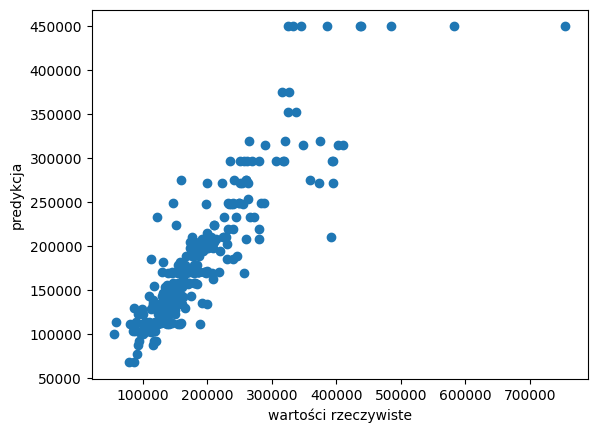

In [46]:
plt.scatter(y_test,pred_tree)
plt.xlabel('wartości rzeczywiste')
plt.ylabel('predykcja')
plt.show()

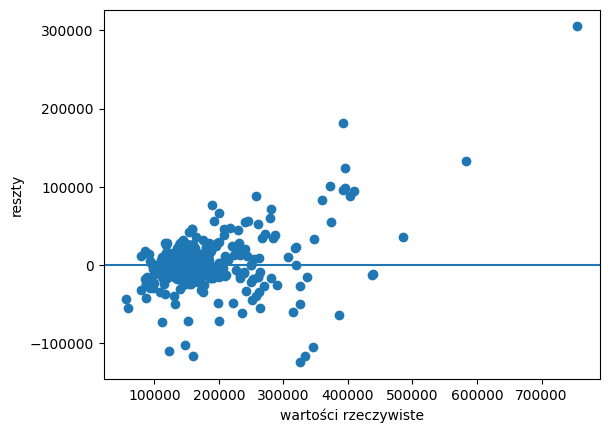

In [47]:
resid_tree = y_test - pred_tree
plt.scatter(y_test, resid_tree)
plt.xlabel('wartości rzeczywiste')
plt.ylabel('reszty')
plt.axhline(0)
plt.show()

In [41]:
print("Finally results below: /n")
print("MSE for Random Forest: ", -1*estymator_RF_1.score(X_test, y_test))
print("MSE for tree: ", -1*estymator_tree.score(X_test, y_test))
print("MSE for KNN: ", mse_knn)

Finally results below: /n
MSE for Random Forest:  944653864.2763907
MSE for tree:  1566814238.6201892
MSE for KNN:  2251967378.682604


In [42]:
print('RF/tree ' , (-1*estymator_RF_1.score(X_test, y_test))/(-1*estymator_tree.score(X_test, y_test)))
print('RF/knn ' , (-1*estymator_RF_1.score(X_test, y_test))/mse_knn)
print()
print('tree/rf ' , (-1*estymator_tree.score(X_test, y_test))/(-1*estymator_RF_1.score(X_test, y_test)))
print('tree/knn ' , (-1*estymator_tree.score(X_test, y_test))/mse_knn)
print()
print('knn/tree ' , mse_knn/(-1*estymator_tree.score(X_test, y_test)))
print('knn/rf ' , mse_knn/(-1*estymator_RF_1.score(X_test, y_test)))


RF/tree  0.6029137602861572
RF/knn  0.4194793731110844

tree/rf  1.658612003689178
tree/knn  0.695753523542056

knn/tree  1.4372906010005326
knn/rf  2.3839074436091168


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8dde8260-d0f0-43e4-ab0e-2df75d4f69c9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>